In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel("05 - Online Retail.xlsx")

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [6]:
# Getting the countries where most of the sale is done
data.Country.value_counts().reset_index().sort_values(by='Country', ascending=False).head(10)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


In [7]:
data.CustomerID.value_counts().head(10)

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
Name: CustomerID, dtype: int64

In [8]:
Quantity = 0

top_10_customers = data.CustomerID.value_counts().head(10).index
for customer in top_10_customers:
    x = data[data['CustomerID']==customer][['Quantity', 'UnitPrice']].sum()
    Quantity += x['Quantity']
#     print(x)
#     print("------------------Percentage--------------------")
#     print(x/data[['Quantity', 'UnitPrice']].sum()*100)
#     print("================================================")

print("Lets check out the Quantity percentage occupied by top 10 customers")
print(Quantity/data['Quantity'].sum()*100)
print("It is a huge amount to be bought by top 10 customers")

Lets check out the Quantity percentage occupied by top 10 customers
9.168348965024292
It is a huge amount to be bought by top 10 customers


In [9]:
data.StockCode.nunique()

4070

In [10]:
data.Description.nunique()

4223

In [11]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
data['amount'] = data.Quantity*data.UnitPrice

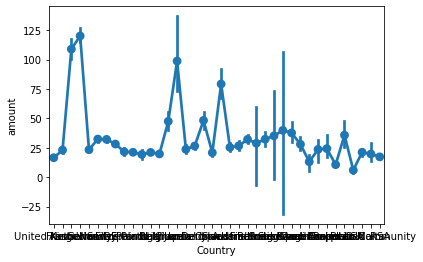

In [19]:
sns.pointplot(data=data, x='Country', y = 'amount')

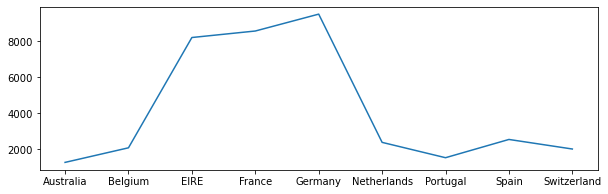

In [50]:
top_country = {}
def func(countries):
    if countries not in top_country.keys():
        top_country[countries] = 0
    elif countries in top_country.keys():
        top_country[countries] += 1
    
data.Country.apply(lambda x : func(x))

# These are the top 10 contries acccording to our sale
top_5_count = pd.Series(top_country).sort_values(ascending=False).head(10)
top_5_count.drop('United Kingdom', inplace=True)
plt.figure(figsize=(10,3))
sns.lineplot(data=top_5_count)